# Business Understanding

Our company is expanding by purchasing and operating airplanes for commercial and private enterprises. In this analysis, I determine which aircraft are the lowest risk for the company to start this new business endeavor. I use the fatal injuries rate as a meaure of safety and investigate the effect the make and model of the aircraft, the number of engines, and the location have on the fatal injuries rate.

I investigate the following three business questions:
1. What number of engines is least likely to result in a fatal injury?
2. What are the top 3 safest models?
3. What are the top 3 safest locations to operate out of?

# Data Understanding

The [Aviation Accident Database & Synopses, up to 2023](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) from the NTSB (National Transportation Safety Board) aviation accident database contains information about ​civil aviation accidents and selected incidents that occurred between 1962 and 2023 within the United States, its territories and possessions, and in international waters. From this database, I analyze the fatal injuries rate, the make/model of the aircrafts, the number of engines on the aircrafts, and the location of the incidents to determine the  safest aircraft to purchase.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aviation_df = pd.read_csv('AviationData.csv', encoding='latin')

/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_9634/3544946329.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('AviationData.csv', encoding='latin')


## Data Preparation

The dataset has approxiately 89,000 accidents and incidents. All but 4 columns have varyign numbers of null values. There are approximately 28,000 unique locations and 8,000 unique makes. These will have to be greatly narrowed down to determine 3 recommended locations and 3 recommended aircrafts.

In [3]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Count of how many null values are in each column
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [6]:
# Number of options for cities
aviation_df['Location'].nunique()

27758

In [7]:
aviation_df['Make'].nunique()

8237

In [8]:
# Print a count of the top 5 values in each column
for col in aviation_df.columns:
    print(col, '\n', aviation_df[col].value_counts(normalize=True).head(), '\n\n')

Event.Id 
 Event.Id
20001212X19172    0.000034
20001214X45071    0.000034
20220730105623    0.000022
20051213X01965    0.000022
20001212X16765    0.000022
Name: proportion, dtype: float64 


Investigation.Type 
 Investigation.Type
Accident    0.956418
Incident    0.043582
Name: proportion, dtype: float64 


Accident.Number 
 Accident.Number
CEN22LA149    0.000022
WPR23LA041    0.000022
WPR23LA045    0.000022
DCA22WA214    0.000022
DCA22WA089    0.000022
Name: proportion, dtype: float64 


Event.Date 
 Event.Date
1984-06-30    0.000281
1982-05-16    0.000281
2000-07-08    0.000281
1983-08-05    0.000270
1984-08-25    0.000270
Name: proportion, dtype: float64 


Location 
 Location
ANCHORAGE, AK      0.004885
MIAMI, FL          0.002251
ALBUQUERQUE, NM    0.002206
HOUSTON, TX        0.002173
CHICAGO, IL        0.002071
Name: proportion, dtype: float64 


Country 
 Country
United States     0.927647
Brazil            0.004218
Canada            0.004049
Mexico            0.004038
United Ki

## Data Cleaning

Before beginning any type of analysis, I must clean the dataset. 
1. I check for **duplicates** (there are none).
2. I **drop columns** that will not be useful to my analysis.
3. I standardize the **column names** and **make names**. 
4. I **create 3 more columns** that will be useful during the analysis: Total_Passengers, Fatal_Injuries_Rate, Uninjured_Rate.
5. I **drop na's** from columns that include number or rates of injuries, fatalities or uninjured because without those numbers, I will not be able to determine safety.

In [9]:
# Make a copy of the dataset to clean
aviation_clean = aviation_df.copy()

In [10]:
# No duplicates
duplicates = aviation_clean[aviation_clean.duplicated()]
len(duplicates)

0

In [13]:
aviation_clean.drop(columns=['Latitude', 'Longitude', 'Schedule', 'Air_Carrier', 'Aircraft_Category', 'Far_Description'], inplace=True)

In [12]:
# Clean column names by replacing '.' in column names with '_'
aviation_clean.columns = aviation_clean.columns.map(lambda x: x.replace('.', '_',).title())

In [11]:
# Rewrite makes in title case
aviation_clean['Make'] = aviation_clean['Make'].map(lambda x: str(x).title())

In [14]:
# Create a column with Total Number of Passengers
aviation_clean['Total_Passengers'] = aviation_clean['Total_Fatal_Injuries'] + aviation_clean['Total_Serious_Injuries'] \
    + aviation_clean['Total_Minor_Injuries'] + aviation_clean['Total_Uninjured']

# Create column with proportion of fatal injuries per accident
aviation_clean['Fatal_Injuries_Rate'] = aviation_clean['Total_Fatal_Injuries'] / aviation_clean['Total_Passengers']

# Create column with proportion of uninjured per accident
aviation_clean['Uninjured_Rate'] = aviation_clean['Total_Uninjured'] / aviation_clean['Total_Passengers']

In [18]:
# NaNs are caused by diving by 0
aviation_clean[aviation_clean['Fatal_Injuries_Rate'].isna()].sample(20)

ValueError: a must be greater than 0 unless no samples are taken

In [16]:
# Clean NaNs from Total Fatal Injuries and Total Uninjured
# I will remove all of the NaNs because without injury and fatality reports, I will not be able to determine safey
aviation_clean.dropna(subset=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', \
                              'Fatal_Injuries_Rate', 'Uninjured_Rate'], inplace=True)

I subset my data into 3 different dataframes in order to answer our 3 business questions: 
1. **us_flights**: This is a subset of domestic flights, which makes up 93% of the data. I drop na's and split Location into City and State.
3. **top_4_models**: This is a subset of the 4 most common manufacturers according to [Forbes](https://www.forbes.com/sites/geoffwhitmore/2019/08/16/what-is-the-safest-airplane-to-fly/?sh=1fee35415c72). I standardize the names of the 4 manufacturers.
4. **engine_data**: This is a subset of all the non-null rows of engine number.

In [19]:
# Narrow the data down to the United States
us_flights = aviation_clean[aviation_clean['Country']=='United States']
us_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68940 entries, 0 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                68940 non-null  object 
 1   Investigation_Type      68940 non-null  object 
 2   Accident_Number         68940 non-null  object 
 3   Event_Date              68940 non-null  object 
 4   Location                68936 non-null  object 
 5   Country                 68940 non-null  object 
 6   Airport_Code            40508 non-null  object 
 7   Airport_Name            42824 non-null  object 
 8   Injury_Severity         68940 non-null  object 
 9   Aircraft_Damage         67386 non-null  object 
 10  Registration_Number     68933 non-null  object 
 11  Make                    68940 non-null  object 
 12  Model                   68916 non-null  object 
 13  Amateur_Built           68939 non-null  object 
 14  Number_Of_Engines       67289 non-null  flo

In [20]:
# Find out what some missing values in the Location column are
us_flights.loc[us_flights['Location'].isna()]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate
4239,20001214X42513,Accident,LAX83LAMS4,1983-03-29,NaN,United States,NaN,NaN,Fatal(1),Destroyed,...,0.0,0.0,0.0,VMC,Unknown,Probable Cause,NaN,1.0,1.0,0.0
10546,20001214X41859,Accident,MIA85LAMS1,1984-12-23,NaN,United States,NaN,NaN,Fatal(1),Destroyed,...,0.0,0.0,0.0,IMC,Unknown,Probable Cause,NaN,1.0,1.0,0.0
12527,20001214X37399,Accident,CHI85FAMS3,1985-08-03,NaN,United States,NaN,NaN,Fatal(1),Destroyed,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,NaN,1.0,1.0,0.0
24214,20001213X29712,Accident,SEA90FAMS1,1989-10-06,NaN,United States,NaN,NaN,Fatal(1),Destroyed,...,0.0,0.0,0.0,VMC,Unknown,Probable Cause,26-06-1992,1.0,1.0,0.0


In [21]:
# I removed the remaining NaNs, as there are only 4 out of approximately 82,000.
us_flights['Location'].dropna(inplace=True)

/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_9634/962894281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_flights['Location'].dropna(inplace=True)


In [22]:
# Create 2 new columns, 'City' and 'State' and drop 'Location'
us_flights['City'] = us_flights['Location'].map(lambda x: str(x).title()[:-4])
us_flights['State'] = us_flights['Location'].map(lambda x: str(x)[-2:])
us_flights.drop(columns=['Location'])

/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_9634/1744065963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_flights['City'] = us_flights['Location'].map(lambda x: str(x).title()[:-4])
/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_9634/1744065963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_flights['State'] = us_flights['Location'].map(lambda x: str(x)[-2:])


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,Registration_Number,...,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,NaN,NaN,Fatal(2),Destroyed,NC6404,...,0.0,UNK,Cruise,Probable Cause,NaN,2.0,1.0,0.0,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,NaN,NaN,Fatal(4),Destroyed,N5069P,...,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,1.0,0.0,Bridgeport,CA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,NaN,NaN,Fatal(2),Destroyed,N1168J,...,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,1.0,0.0,Eureka,CA
6,20001218X45446,Accident,CHI81LA106,1981-08-01,United States,NaN,NaN,Fatal(4),Destroyed,N4988E,...,0.0,IMC,Unknown,Probable Cause,06-11-2001,4.0,1.0,0.0,Cotton,MN
7,20020909X01562,Accident,SEA82DA022,1982-01-01,United States,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,N2482N,...,2.0,VMC,Takeoff,Probable Cause,01-01-1982,2.0,0.0,1.0,Pullman,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88881,20221221106483,Accident,CEN23LA067,2022-12-21,United States,NaN,NaN,Minor,NaN,N8786U,...,0.0,NaN,NaN,NaN,22-12-2022,1.0,0.0,0.0,Auburn Hills,MI
88882,20221222106486,Accident,CEN23LA068,2022-12-21,United States,NaN,NaN,Minor,NaN,N321GD,...,1.0,NaN,NaN,NaN,27-12-2022,2.0,0.0,0.5,Reserve,LA
88884,20221227106491,Accident,ERA23LA093,2022-12-26,United States,NaN,NaN,Minor,NaN,N1867H,...,0.0,NaN,NaN,NaN,29-12-2022,1.0,0.0,0.0,Annapolis,MD
88886,20221227106497,Accident,WPR23LA075,2022-12-26,United States,PAN,PAYSON,Non-Fatal,Substantial,N749PJ,...,1.0,VMC,NaN,NaN,27-12-2022,1.0,0.0,1.0,Payson,AZ


In [23]:
# Create new dataframe with top 4 models. I chose the most common manufacturers according to Forbes.
top_4_models = us_flights[us_flights['Make'].str.contains('|'.join(['Boeing', 'Airbus', 'Bombardier', 'Embraer']))]
top_4_models.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate,City,State
50,20020917X02242,Accident,LAX82DVA10,1982-01-06,"NEAR BAKERSFIEL, CA",United States,NaN,NaN,Non-Fatal,Substantial,...,1.0,IMC,Cruise,Probable Cause,06-01-1983,2.0,0.000000,0.5,Near Bakersfiel,CA
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,CKB,BENEDUM,Incident,Minor,...,2.0,VMC,Taxi,Probable Cause,12-01-1983,2.0,0.000000,1.0,Clarksburg,WV
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,WASHINGTON NATIONAL,Fatal(78),Destroyed,...,0.0,IMC,Takeoff,Probable Cause,13-01-1983,87.0,0.896552,0.0,Washington,DC
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,MFR,MEDFORD-JACKSON COUNTY,Non-Fatal,Minor,...,3.0,VMC,Taxi,Probable Cause,06-02-1983,3.0,0.000000,1.0,Medford,OR
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,ONT,ONTARIO INTERNATIONAL,Incident,Minor,...,119.0,IMC,Approach,Probable Cause,15-02-1983,119.0,0.000000,1.0,Ontario,CA


In [24]:
top_4_models['Make'].value_counts()

Make
Boeing                            1198
Embraer                            107
Airbus                              90
Airbus Industrie                    66
Bombardier Inc                      50
Boeing Stearman                     33
Bombardier                          28
Airbus Helicopters                  11
Bombardier, Inc.                     8
Embraer S A                          7
Embraer-Empresa Brasileira De        6
Boeing Vertol                        5
Airbus Helicopters Inc               3
Boeing - Canada (De Havilland)       2
Embraer S.A.                         2
Embraer Executive Aircraft Inc       1
Airbus Helicopters (Eurocopte        1
Airbus Helicopters Deutschland       1
Boeing Company                       1
Bombardier Learjet Corp.             1
Bombardier Canadair                  1
Airbus/Eurocopter                    1
Boeing-Stearman                      1
Boeing Of Canada/Dehav Div           1
Boeing-Brown                         1
Boeing (Stearman)   

In [25]:
# Create a function to standardize the aircraft names

def standardize_aircraft_name(name):
    if 'Boeing' in name:
        new_name = name.replace(name, 'Boeing')
    elif 'Airbus' in name:
        new_name = name.replace(name, 'Airbus')
    elif 'Embraer' in name:
        new_name = name.replace(name, 'Embraer')
    elif 'Bombardier' in name:
        new_name = name.replace(name, 'Bombardier')
    else:
        new_name = name
    return new_name

In [26]:
# I noticed there were variations of Make names, so I wanted to standardize the names
top_4_models['Make'] = top_4_models['Make'].map(lambda x: standardize_aircraft_name(x))

/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_9634/2991099831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_4_models['Make'] = top_4_models['Make'].map(lambda x: standardize_aircraft_name(x))


In [27]:
top_4_models['Make'].value_counts()

Make
Boeing        1243
Airbus         173
Embraer        123
Bombardier      88
Name: count, dtype: int64

In [30]:
top_4_models.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1627 entries, 50 to 88867
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                1627 non-null   object 
 1   Investigation_Type      1627 non-null   object 
 2   Accident_Number         1627 non-null   object 
 3   Event_Date              1627 non-null   object 
 4   Location                1627 non-null   object 
 5   Country                 1627 non-null   object 
 6   Airport_Code            1072 non-null   object 
 7   Airport_Name            1098 non-null   object 
 8   Injury_Severity         1627 non-null   object 
 9   Aircraft_Damage         1062 non-null   object 
 10  Registration_Number     1622 non-null   object 
 11  Make                    1627 non-null   object 
 12  Model                   1627 non-null   object 
 13  Amateur_Built           1627 non-null   object 
 14  Number_Of_Engines       1562 non-null   flo

In [28]:
# Clean missing values in 'Number of Engines' 

engine_data = aviation_clean[aviation_clean['Number_Of_Engines'].notnull()]

In [31]:
# Export the clean data frame using df.to_csv() and upload to tableau to produce visuals

top_4_models.to_csv('top_4_models.csv')

# engine_data will be uploaded separately as it is a much smaller dataset. I want to keep more values to answer the other 2 business questions.
engine_data.to_csv('engine_data.csv');

# Exploratory Data Analysis

In [ ]:
# Bombardier and Boeing have the lowest Fatal_Injuries_Rate mean and Bombardier has the highest Uninjured_Rate mean so I'm thinking
# of analyzing further to choose 3 Bombardier models. 

<Axes: xlabel='Make'>

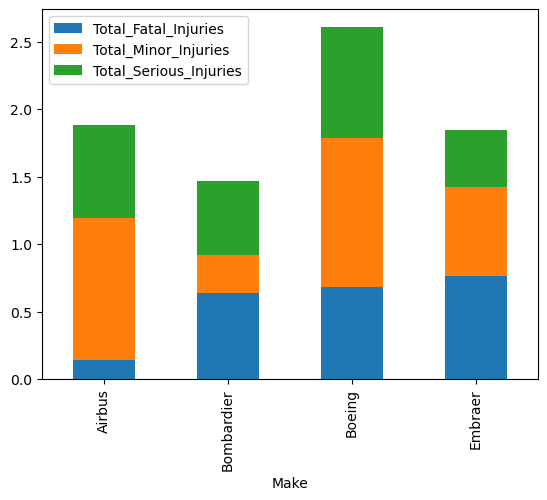

In [50]:
top_4_models.groupby(['Make'])[['Total_Fatal_Injuries', 'Total_Minor_Injuries', 'Total_Serious_Injuries']]\
    .mean().sort_values(by='Total_Fatal_Injuries', ascending=True).head().plot(kind='bar', stacked=True)

<Axes: xlabel='Model'>

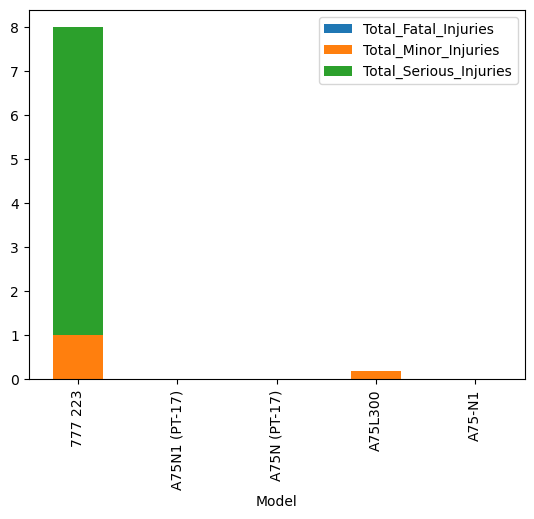

In [51]:
top_4_models.groupby(['Model'])[['Total_Fatal_Injuries', 'Total_Minor_Injuries', 'Total_Serious_Injuries']]\
    .mean().sort_values(by='Total_Fatal_Injuries', ascending=True).head().plot(kind='bar', stacked=True)

<Axes: xlabel='Make'>

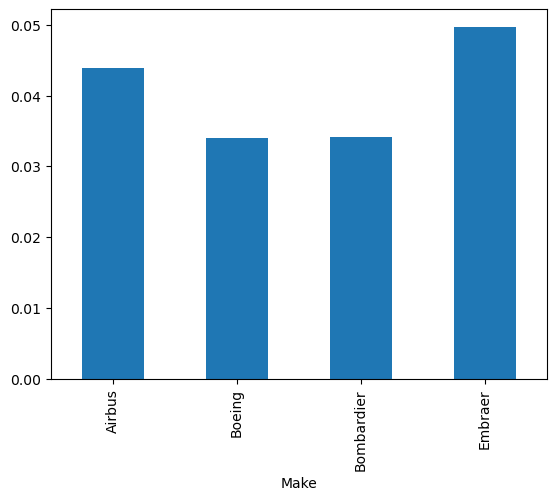

In [32]:
top_4_models.groupby(['Make'])['Fatal_Injuries_Rate'].mean().plot(kind='bar')

<Axes: xlabel='Model'>

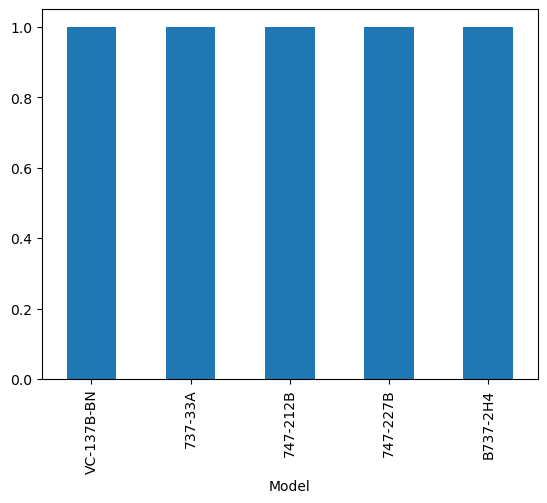

In [46]:
top_4_models.groupby(['Model'])['Uninjured_Rate'].mean().sort_values(ascending=False).head().plot(kind='bar')

<Axes: xlabel='Make'>

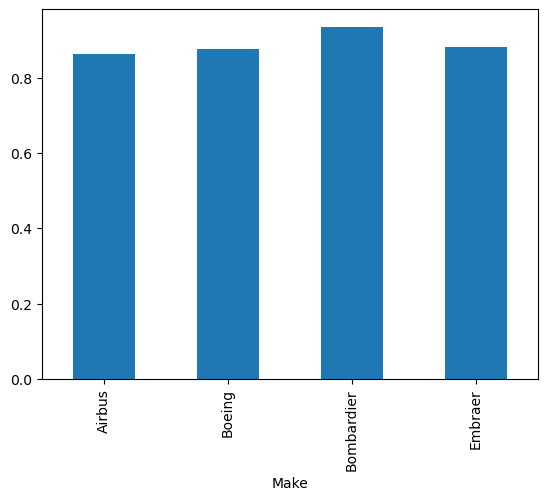

In [33]:
top_4_models.groupby(['Make'])['Uninjured_Rate'].mean().plot(kind='bar')

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(x=top_4_models["Make"], height=top_4_models["Total_Uninjured"], alpha=0.3)

In [ ]:
# Scatter plot of Number of Engines vs. Total Fatal Injuries
aviation_clean.plot(x='Fatal_Injuries_Rate', y='Number_Of_Engines', kind='scatter')

# This would probably look better as a bar chart

In [ ]:
No_Fatal_Injuries = aviation_clean[aviation_clean['Total_Fatal_Injuries'] == 0.0]

In [ ]:
fig, ax = plt.subplots()
sns.set(style=whitegrid)
sns.barplot(data=aviation_clean, x='Total_Fatal_Injuries', y='Make/Model', ax=ax, orient='h');

In [ ]:
# Geographical Map of Location vs. Total Fatal Injuries

# Conclusions

## Limitations

There are various limitations in this analysis.

1. I could not compute the proportion of accidents to total number of flights, as this data includes only records of accidents or incidents. This data does not include clean records of flights with no accidents or incidents. When recommending an aircraft company, aircraft model, or location of operation, I used the basis of which has the lowest number of accidents/incidents, with zero accidents/incidents not being an option.

2. 

## Recommendations

## Next Steps